In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from src.bert_sentiment import BertAmazonSentiment
import seaborn as sn

In [3]:
class DummySentimentClassifier:
    """
    For testing purposes, predicts on a list of strings by marking them
    all as negative sentiment, harsh!
    """
    def predict(self, string_list):
        return np.zeros(len(string_list))
    
    def predict_one(self, string):
        return predict([string])

In [5]:
dummy = DummySentimentClassifier()

In [6]:
with open('./flask/flask-JH/app/dummy.pkl', 'wb') as f:
    pickle.dump(dummy, f)

In [2]:
pkl_path = 'app/models/amazon_reviews/'
bert = BertAmazonSentiment(pkl_path)

In [3]:
test_strings = ['This ting bussin bussin, drippin glizzy juice down my bootty hole']

In [4]:
test_string = test_strings[0]

In [5]:
bert.pretty_classify_one(test_string)

'BERT is 98.8% sure your review is positive.'

In [8]:
bert_result = bert.classify(test_strings)[0]

In [12]:
idx = np.argmax(bert_result)

In [13]:
sentiment_dict = {0: 'negative', 1:'positive'}

In [21]:
print('BERT is {0:.1f}% sure your review is {1}.'.format(100*bert_result[idx], sentiment_dict[idx]))

BERT is 98.8% sure your review is positive.


In [3]:
confusion_mat = np.array([[0.4850275, 0.0149725],
       [0.01496  , 0.48504  ]])

In [4]:
confusion_mat

array([[0.4850275, 0.0149725],
       [0.01496  , 0.48504  ]])

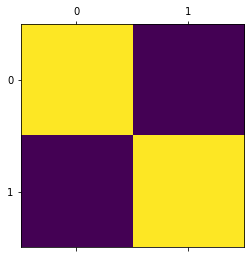

In [6]:
plt.matshow(confusion_mat)

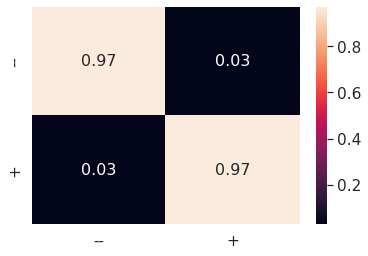

In [16]:
array = confusion_mat

df_cm = pd.DataFrame(2*array, index=['--','+'], columns=['--','+'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.savefig('confusion_matrix.png')